In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [2]:
df = pd.read_csv("C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\master_dataset.csv")

## Data Information and Data Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         162 non-null    object 
 1   BEV_Registrations            162 non-null    int64  
 2   Total_Vehicle_Registrations  162 non-null    int64  
 3   BEV_Share                    162 non-null    float64
 4   Charging_Infrastructure      162 non-null    int64  
 5   RHDI_per_head                162 non-null    float64
 6   CPI                          162 non-null    float64
 7   Bank_Rate                    162 non-null    float64
 8   Petrol_Price                 162 non-null    float64
 9   Diesel_Price                 162 non-null    float64
 10  PiCG_Amount_GBP              162 non-null    float64
 11  picg_active                  162 non-null    int64  
 12  GT_Awareness_General         162 non-null    int64  
 13  GT_Awareness_Conside

In [4]:
df.describe()

,BEV_Registrations,Total_Vehicle_Registrations,BEV_Share,Charging_Infrastructure,RHDI_per_head,CPI,Bank_Rate,Petrol_Price,Diesel_Price,PiCG_Amount_GBP,picg_active,GT_Awareness_General,GT_Awareness_Consideration,GT_Infrastructure_Concern,GT_Range_Anxiety
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,11912.543210,332475.308642,0.048164,13912.320988,5597.666667,107.014815,1.019136,129.551543,135.548272,3564.814815,0.845679,28.586420,24.870370,30.907407,22.043210
std,17540.735898,134772.859323,0.071419,16559.792727,274.907573,11.226644,1.454167,15.831728,18.599335,1785.151740,0.362376,23.425485,22.072196,26.486327,23.302587
min,18.000000,104200.000000,0.000050,0.000000,5047.000000,91.300000,0.100000,101.430000,101.140000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
25%,600.000000,244250.000000,0.001826,0.000000,5343.250025,99.625000,0.500000,117.607500,121.390000,3000.000000,1.000000,10.000000,7.000000,10.000000,0.000000
50%,1700.000000,281550.000000,0.005859,6574.500000,5710.500000,104.150000,0.500000,128.960000,134.335000,4500.000000,1.000000,19.000000,16.500000,23.000000,15.000000
75%,19550.000000,431800.000000,0.085783,21917.250000,5796.750000,109.175000,0.750000,136.485000,142.157500,5000.000000,1.000000,45.750000,44.000000,51.000000,40.250000
max,74600.000000,759600.000000,0.323224,64577.000000,5952.000000,134.100000,5.250000,189.420000,197.840000,5000.000000,1.000000,100.000000,100.000000,100.000000,100.000000


## Correlation Matrix

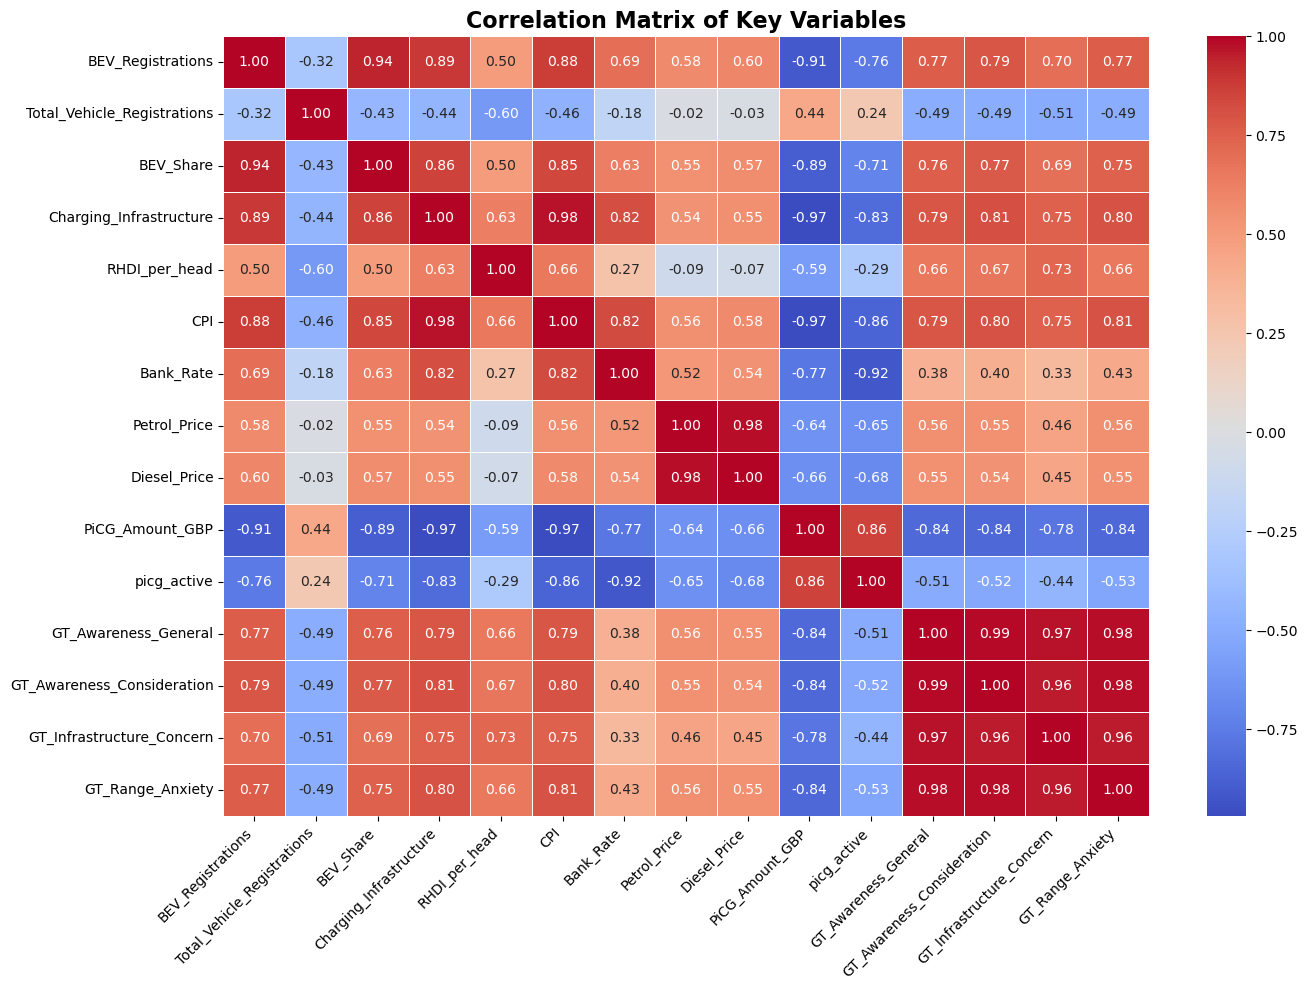

In [5]:
def create_correlation_heatmap(input_filepath: str) -> None:
    """
    Loads the master dataset, calculates the correlation matrix for numeric
    columns, and visualizes it as a heatmap.

    Args:
        input_filepath (str): The file path for the master dataset.
        output_filepath (str): The file path to save the heatmap image.
    """
    try:
        # --- 1. Load the Master Dataset ---
        df = pd.read_csv(input_filepath)

        # --- 2. Prepare Data for Correlation ---
        # Select only the numeric columns relevant for the analysis.
        numeric_cols = [
            'BEV_Registrations', 'Total_Vehicle_Registrations', 'BEV_Share', 'Charging_Infrastructure',
            'RHDI_per_head', 'CPI', 'Bank_Rate', 'Petrol_Price', 'Diesel_Price',
            'PiCG_Amount_GBP', 'picg_active', 'GT_Awareness_General',
            'GT_Awareness_Consideration', 'GT_Infrastructure_Concern', 'GT_Range_Anxiety'
        ]
        df_numeric = df[numeric_cols]

        # --- 3. Calculate the Correlation Matrix ---
        corr_matrix = df_numeric.corr()

        # --- 4. Visualize the Heatmap ---
        plt.figure(figsize=(14, 10))
        sns.heatmap(
            corr_matrix,
            annot=True,          # Show the correlation values on the map
            fmt=".2f",           # Format values to two decimal places
            cmap='coolwarm',     # Use a diverging colormap
            linewidths=.5
        )
        plt.title('Correlation Matrix of Key Variables', fontsize=16, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()

    except FileNotFoundError:
        print(f"Error: The master dataset '{input_filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- Execute the function ---
if __name__ == '__main__':
    INPUT_FILE = "C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\master_dataset.csv"
    create_correlation_heatmap(INPUT_FILE)

## Monthly BEV Registration Trend

BEV registrations trend plot saved to 'bev_registrations_trend.png'


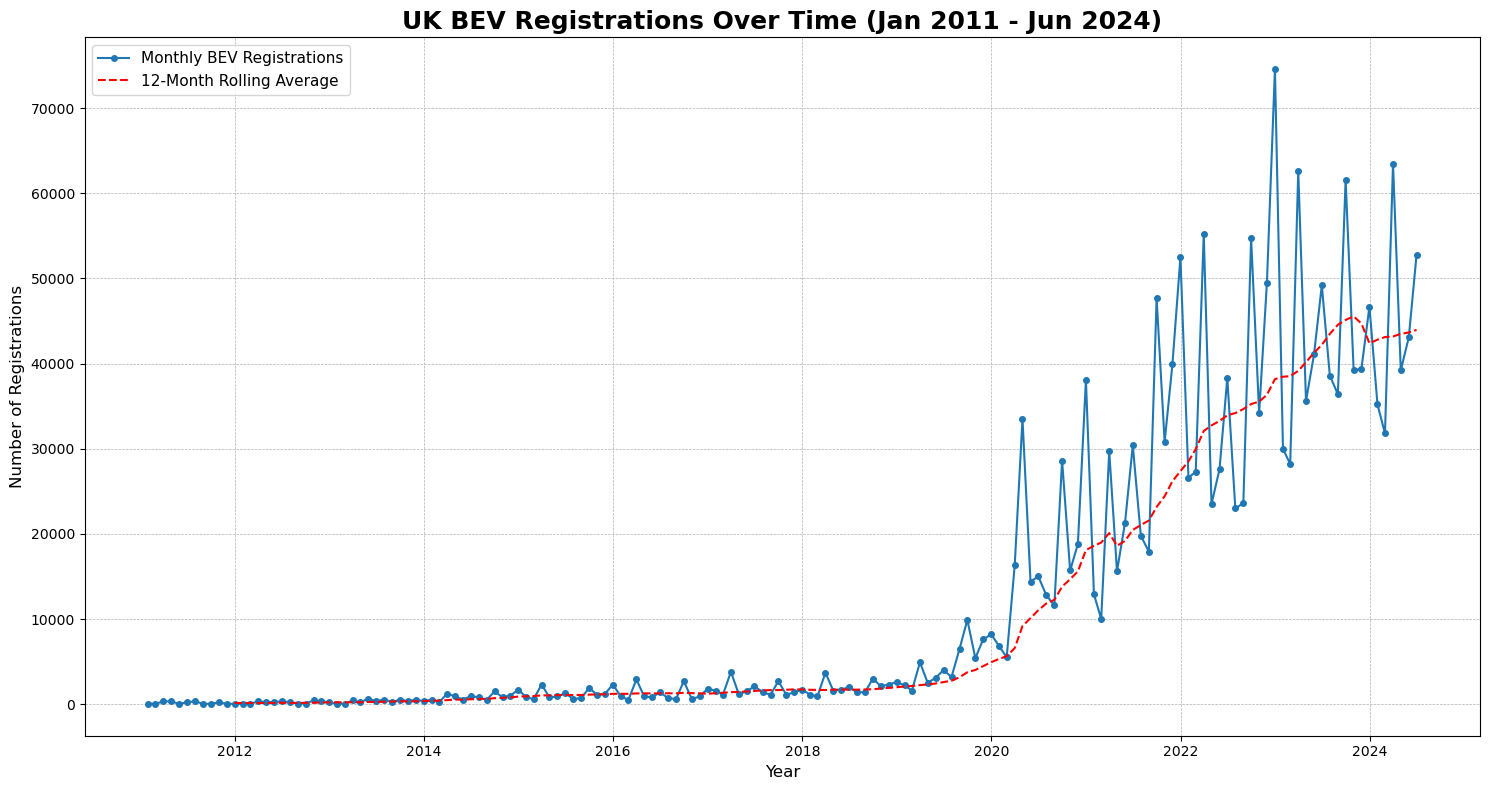

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_bev_trend(input_filepath: str, output_filepath: str) -> None:
    """
    Loads the master dataset and creates a line plot of BEV registrations over time.

    Args:
        input_filepath (str): The file path for the master dataset.
        output_filepath (str): The file path to save the trend plot image.
    """
    try:
        df = pd.read_csv(input_filepath)
        df['date'] = pd.to_datetime(df['date'])
        
        plt.figure(figsize=(15, 8))
        plt.plot(df['date'], df['BEV_Registrations'], marker='o', linestyle='-', markersize=4, label='Monthly BEV Registrations')
        
        rolling_avg = df['BEV_Registrations'].rolling(window=12).mean()
        plt.plot(df['date'], rolling_avg, linestyle='--', color='red', label='12-Month Rolling Average')

        plt.title('UK BEV Registrations Over Time (Jan 2011 - Jun 2024)', fontsize=18, fontweight='bold')
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Registrations', fontsize=12)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend(fontsize=11)
        
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.YearLocator(2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

        plt.tight_layout()
        plt.savefig(output_filepath)
        print(f"BEV registrations trend plot saved to '{output_filepath}'")

    except FileNotFoundError:
        print(f"Error: The master dataset '{input_filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    INPUT_FILE = "C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\master_dataset.csv"
    OUTPUT_FILE = "bev_registrations_trend.png"
    plot_bev_trend(INPUT_FILE, OUTPUT_FILE)

## UK BEV Share Trend

BEV share trend plot saved to 'bev_share_trend.png'


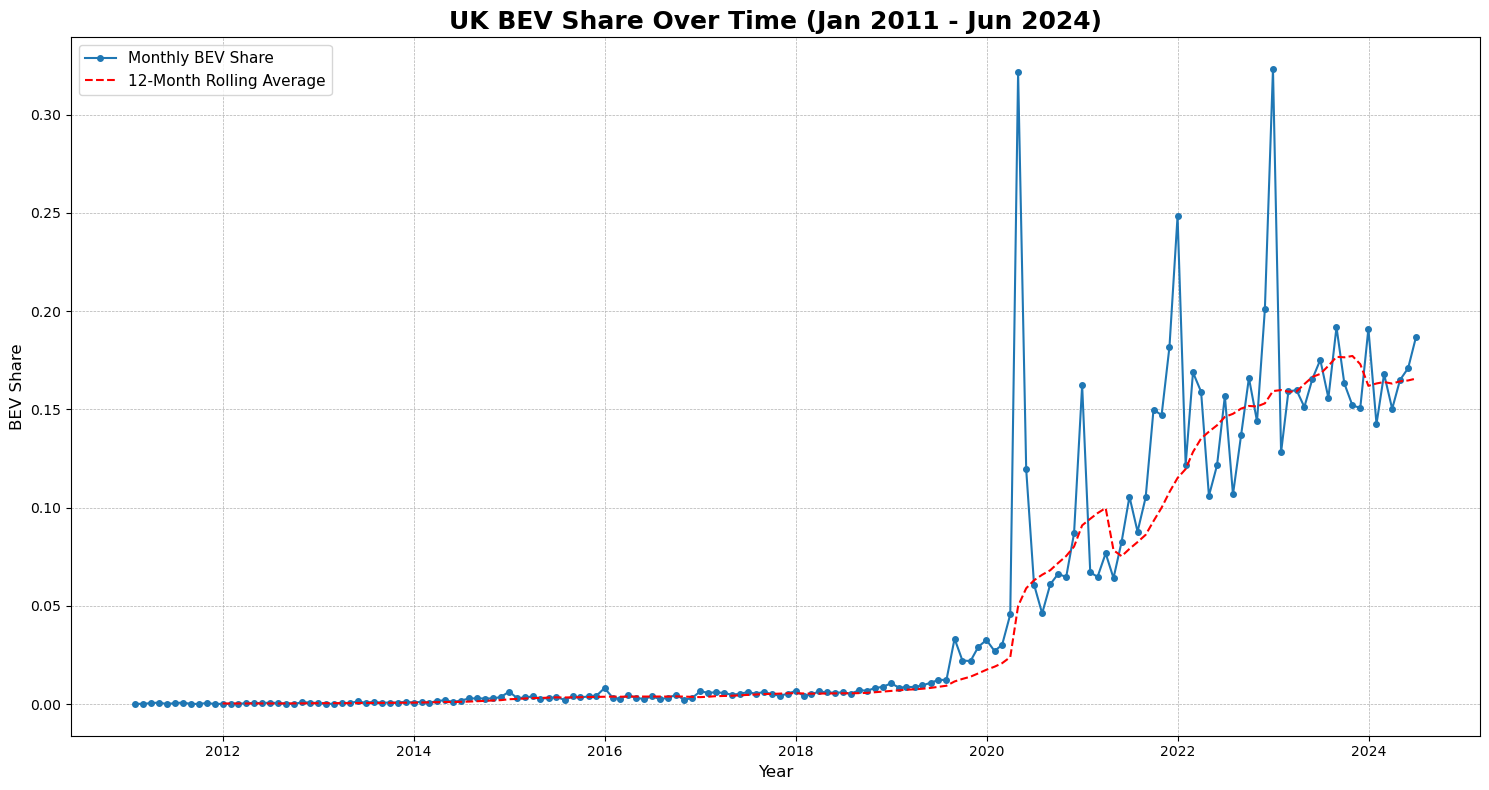

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_bev_trend(input_filepath: str, output_filepath: str) -> None:
    """
    Loads the master dataset and creates a line plot of BEV registrations over time.

    Args:
        input_filepath (str): The file path for the master dataset.
        output_filepath (str): The file path to save the trend plot image.
    """
    try:
        df = pd.read_csv(input_filepath)
        df['date'] = pd.to_datetime(df['date'])
        
        plt.figure(figsize=(15, 8))
        plt.plot(df['date'], df['BEV_Share'], marker='o', linestyle='-', markersize=4, label='Monthly BEV Share')
        
        rolling_avg = df['BEV_Share'].rolling(window=12).mean()
        plt.plot(df['date'], rolling_avg, linestyle='--', color='red', label='12-Month Rolling Average')

        plt.title('UK BEV Share Over Time (Jan 2011 - Jun 2024)', fontsize=18, fontweight='bold')
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('BEV Share', fontsize=12)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend(fontsize=11)
        
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.YearLocator(2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

        plt.tight_layout()
        plt.savefig(output_filepath)
        print(f"BEV share trend plot saved to '{output_filepath}'")

    except FileNotFoundError:
        print(f"Error: The master dataset '{input_filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    INPUT_FILE = "C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\master_dataset.csv"
    OUTPUT_FILE = "bev_share_trend.png"
    plot_bev_trend(INPUT_FILE, OUTPUT_FILE)

## Monthly Public Chargers Trend 

Charging infrastructure trend plot saved to 'charging_infra_trend.png'


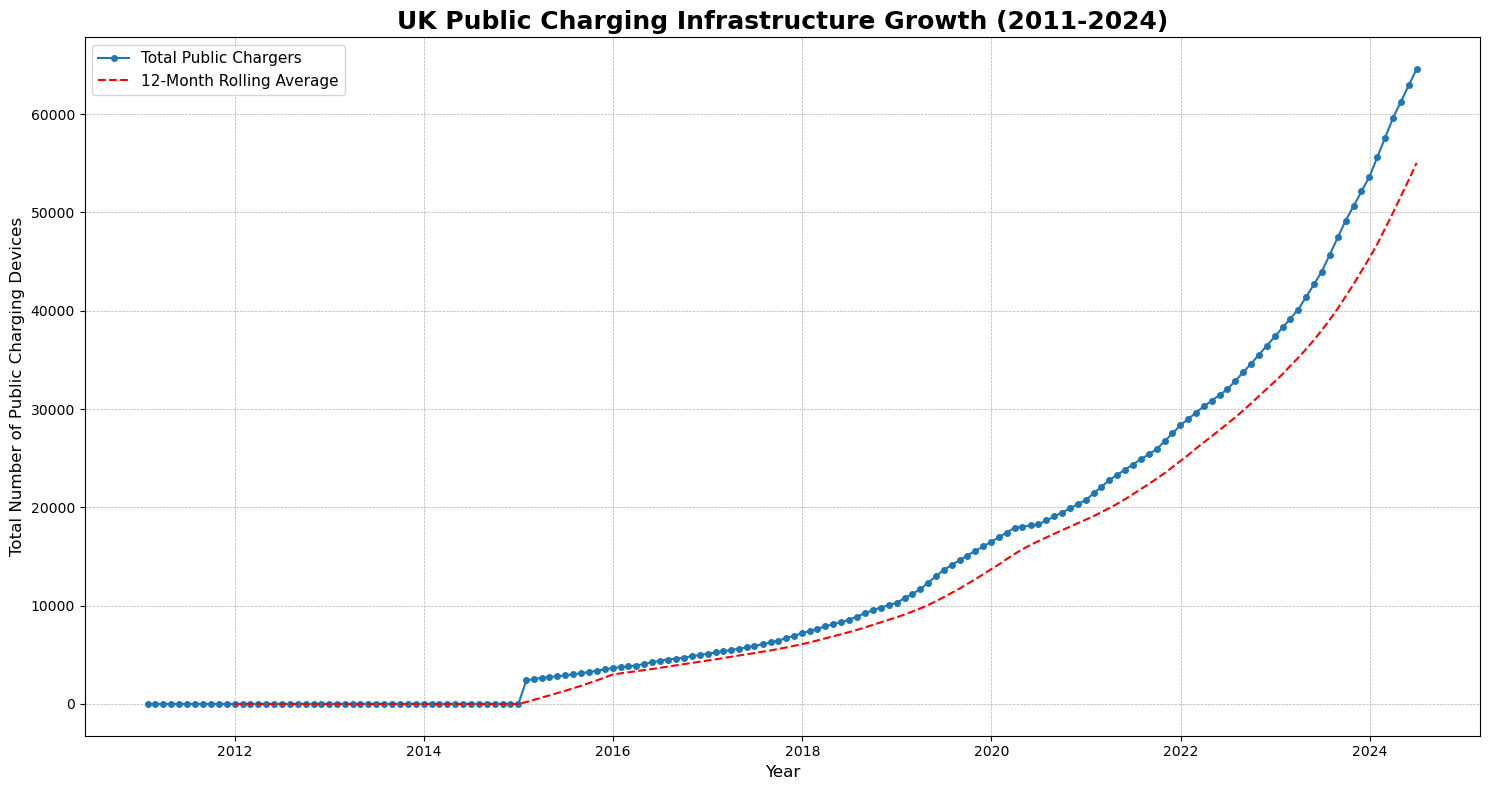

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_infra_trend(input_filepath: str, output_filepath: str) -> None:
    """
    Loads the master dataset and creates a line plot of the UK's public
    charging infrastructure growth over time.

    Args:
        input_filepath (str): The file path for the master dataset.
        output_filepath (str): The file path to save the trend plot image.
    """
    try:
        df = pd.read_csv(input_filepath)
        df['date'] = pd.to_datetime(df['date'])
        
        plt.figure(figsize=(15, 8))
        plt.plot(df['date'], df['Charging_Infrastructure'], marker='o', linestyle='-', markersize=4, label='Total Public Chargers')
        
        rolling_avg = df['Charging_Infrastructure'].rolling(window=12).mean()
        plt.plot(df['date'], rolling_avg, linestyle='--', color='red', label='12-Month Rolling Average')

        plt.title('UK Public Charging Infrastructure Growth (2011-2024)', fontsize=18, fontweight='bold')
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Total Number of Public Charging Devices', fontsize=12)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend(fontsize=11)
        
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.YearLocator(2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

        plt.tight_layout()
        plt.savefig(output_filepath)
        print(f"Charging infrastructure trend plot saved to '{output_filepath}'")

    except FileNotFoundError:
        print(f"Error: The master dataset '{input_filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    INPUT_FILE = "C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\master_dataset.csv"
    OUTPUT_FILE = "charging_infra_trend.png"
    plot_infra_trend(INPUT_FILE, OUTPUT_FILE)